<a href="https://colab.research.google.com/github/sehii14/Computer-Vision-Mini-Projects/blob/main/text_lines_recognition_deutsche_kurs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import cv2
import os
import matplotlib.pylab as plt
import numpy as np

In [16]:
!apt install tesseract-ocr
!pip install pytesseract
!apt install tesseract-ocr-deu


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-deu is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


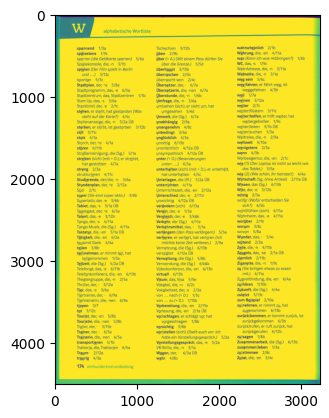

In [17]:
im = cv2.imread('/content/drive/MyDrive/deutschekurs_words_recognition/Scan3.jpg',0)
plt.imshow(im)

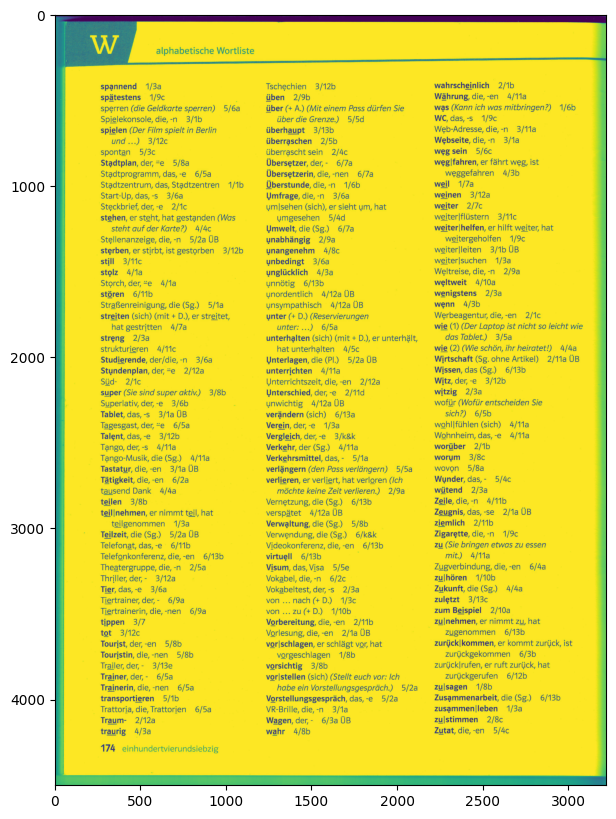

In [18]:
frame = cv2.medianBlur(im,1)
plt.figure(figsize=(20,10))
plt.imshow(frame)

656


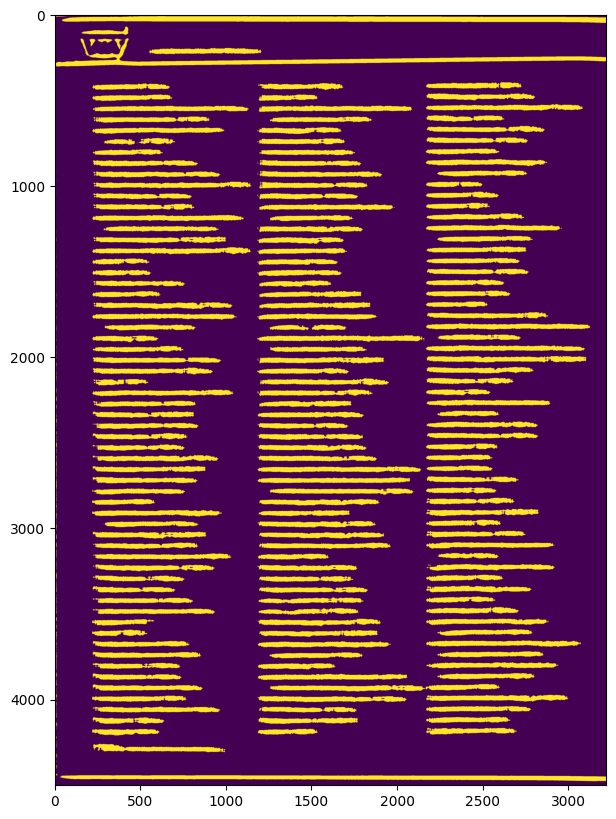

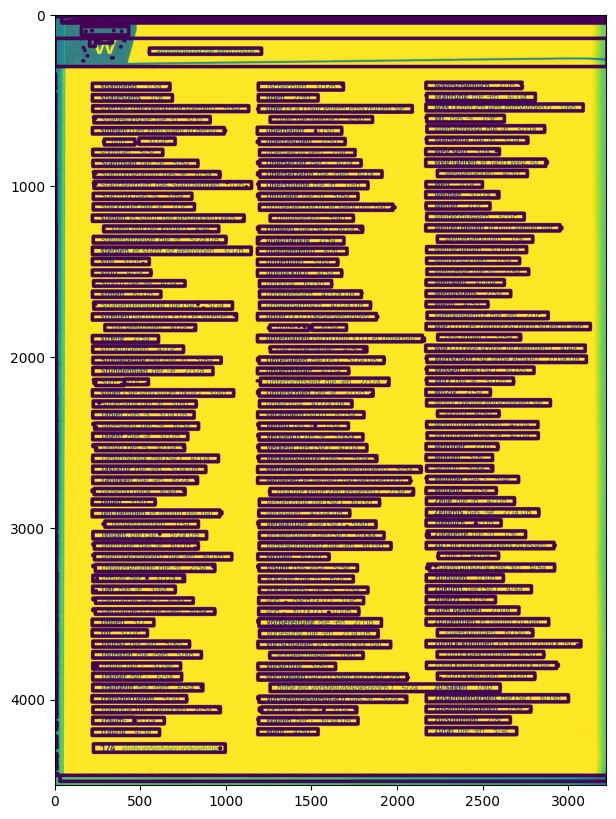

In [19]:
def find_bounding_boxes(image):
  gray = image.copy()

  #It's important for us to separate the lines, so we blur horizontally.
  blurred = cv2.blur(gray, (120, 25))

  thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 51, 4)
  frame = cv2.medianBlur(thresh,25)
  plt.figure(figsize=(20,10))
  plt.imshow(thresh)

  # Finding line contours
  contours,_ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  #  Calculating bounding boxes for rows
  bounding_boxes = [cv2.boundingRect(contour) for contour in contours]

  return bounding_boxes


bounding_boxes = find_bounding_boxes(frame)
print(len(bounding_boxes))
image = frame.copy()
# Displaying bounding boxes on an image
for bounding_box in bounding_boxes:
  x, y, w, h = bounding_box
  # print(bounding_box)
  cv2.rectangle(image, (x, y), (x + w, y + h), 0, 20)

plt.figure(figsize=(20,10))
plt.imshow(image)
# print(image.shape)

In [20]:
import pytesseract
pytesseract.get_languages()

['deu', 'eng', 'osd']

In [21]:
i = 0
strings = []
for bounding_box in bounding_boxes:
  x, y, w, h = bounding_box
  margine = 20

  if w > 250 and h>20:
    row = frame[y-margine:y + h+margine, x-margine:x + w+margine].copy()
    if row.shape[0]<20 or row.shape[1]<250:
      continue

    lang = 'deu'
    text = pytesseract.image_to_string(row,lang=lang,config='--psm 11')
    strings.append(text)
    print(text.split(),text)

    i +=1



[] 
['174', 'einhundertvierundsiebzig'] 174 einhundertvierundsiebzig

['traurig', '4/3a'] traurig 4/3a

['wahr', '4/8b'] wahr

4/8b

['Zutat,', 'die,', '-en', '5/4c'] Zutat, die, -en 5/4c

['Wagen,', 'der,', '-', '6/3a', 'ÜB'] Wagen, der, -

6/3a ÜB

['zulstimmen', '2/8c'] zulstimmen 2/8c

['VR-Brille,', 'die,', '-n', '3/la'] VR-Brille, die, -n

3/la

['Trattoria,', 'die,', 'Trattorien', '6/5a'] Trattoria, die, Trattorien 6/5a

['zusammen]|leben', '1/3a'] zusammen]|leben 1/3a

['Vorstellungsgespräch,', 'das,', '-e', '5/2a'] Vorstellungsgespräch, das, -e 5/2a

['transportieren', '5/1b'] transportieren 5/1b

['Zusammenarbeit,', 'die', '(Sg.)', '6/13b'] Zusammenarbeit, die (Sg.)

6/13b

['Trainerin,', 'die,-nen', '6/5a'] Trainerin, die,-nen 6/5a

['.', 'habe', 'ein', 'Vorstellungsgespräch.)', '5/2a', 'zulsagen', '1/8b'] . habe ein Vorstellungsgespräch.) 5/2a

zulsagen 1/8b

['vor|stellen', '(sich)', '(Stellt', 'euch', 'vor:', 'Ich'] vor|stellen (sich) (Stellt euch vor: Ich


In [22]:
pip install googletrans==4.0.0-rc1

In [23]:
import re

def remove_punctuation(text):
  """
  Видаляє коми та інші знаки пунктуації з тексту за допомогою регулярних виразів.
  """
  pattern = r"[,./?!;:\"'-()]"  # Додайте сюди інші небажані символи
  return re.sub(pattern, '', text)

In [24]:
from googletrans import Translator

delimiters = r'[ ,;:.-]+'


translator =  Translator()
for s in sorted(strings, key=str.lower):
  line = re.split(delimiters,s)

  for item in line:
    if any(char.isdigit() for char in list(item)):
      line.remove(item)

  german_articles = ["der", "die", "das"]

  if len(line)<1:
    continue
  translate_word = []
  if  len(line)>1 and any(article in line[1] for article in german_articles):
    de_word = remove_punctuation(line[1] + " " + line[0])
  else:
    de_word = remove_punctuation(line[0])
  # print(line)
  if len(de_word)<2:
    continue
  translated_word = translator.translate(de_word, src='de', dest='en')
  print(de_word, ' - ',translated_word.text)
  print()

einhundertvierundsiebzig
  -  one hundred seventy of four

alphabetische  -  alphabetical

das  -  the



_

nn

  -  _

nn

hat  -  has

hat  -  has

mit  -  with

möchte  -  want

sich  -  itself

spannend  -  exciting

die sperren  -  The locks

die Spielekonsole  -  The game console

spielen  -  play

spätestens  -  at latest

der Stadtplan  -  The city map

das Stadtprogramm  -  The city program

das Stadtzentrum  -  The city center

Start  -  start

der Steckbrief  -  The profile

stehen  -  stand

steht  -  stands

die Stellenanzeige  -  The job advertisement

sterben  -  die

stolz  -  proud

der Storch  -  The stork

die Straßenreinigung  -  The street cleaning

streiten  -  argue

streng  -  strictly

strukturieren  -  structure

derdie Studierende  -  the students

der Stundenplan  -  the schedule

stören  -  disturb

super  -  super

der Superlativ  -  The superlative

das Tablet  -  The tablet

der Tagesgast  -  The daily guest

das Talent  -  The talent

der Tango  -  Th

In [25]:
import time
time.sleep(5)
from google.colab import runtime
runtime.unassign()